## <center>Black Friday data analysis and predictions</center>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
dataset = pd.read_csv('../DataOptimization/BlackFriday.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data cleansing
- Taking care of the missing values
- NaN values for Product_Category_2 and Product_Categrory_3 would mean that the concerned person did not buy the  products from these categories

In [135]:
def handle_nan():
    nan_values = dataset.isnull().sum().sort_values(ascending = False)
    nan_values = nan_values[nan_values > 0] / dataset.shape[0]
    return (f'{nan_values * 100} %')

In [136]:
print(handle_nan())

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


In [137]:
dataset = dataset.fillna(0)

In [138]:
print(handle_nan())

Series([], dtype: float64) %


### Handling the data types
- We focus on object datatypes as they cannot be directly fed into a Machine Learning Model
- Dropping irrelevant features like User_ID and Product_ID 

In [139]:
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [140]:
#unique values in Gender parameter
gender = np.unique(dataset.Gender)
gender

array(['F', 'M'], dtype=object)

In [141]:
def number_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0

In [142]:
dataset['Gender'] = dataset['Gender'].apply(number_gender)
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


In [143]:
age = np.unique(dataset['Age'])
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [144]:
def number_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

In [145]:
dataset['Age'] = dataset['Age'].apply(number_age)
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,0.0,0.0,7969


In [146]:
city_category = np.unique(dataset['City_Category'])
city_category

array(['A', 'B', 'C'], dtype=object)

In [147]:
def number_city_category(city_category):
    if city_category == 'A':
        return 0
    elif city_category == 'B':
        return 1
    else:
        return 2

In [148]:
dataset['City_Category'] = dataset['City_Category'].apply(number_city_category)
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,0.0,0.0,7969


In [149]:
stay_in_city = np.unique(dataset['Stay_In_Current_City_Years'])
stay_in_city

array(['0', '1', '2', '3', '4+'], dtype=object)

In [150]:
def number_stay_in_city(stay_in_city):
    if stay_in_city == '4+':
        return 4
    else:
        return int(stay_in_city)

In [151]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(number_stay_in_city)
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [152]:
cols = ['User_ID', 'Product_ID']
dataset.drop(cols, inplace=True, axis=1)

In [153]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969


### Exploratory Data Analysis (EDA)

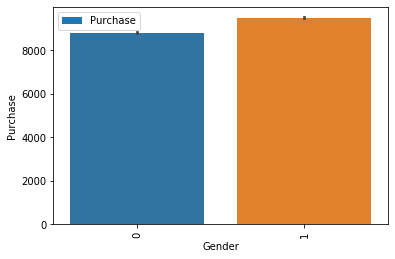

In [157]:
# Purchases based on gender - Men tend to spend more on Black Friday than women 
dataset[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = dataset)
plt.show()

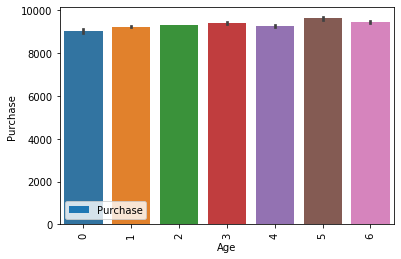

In [158]:
#purchases based on age
dataset[['Age', 'Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data=dataset)
plt.show()

### boxplots to study the deviation in Age vs Purchase
- There are no much deviations. So, no matter the age, full use of purchasing power is made on a Black Friday. Maybe because everything is damn cheap 

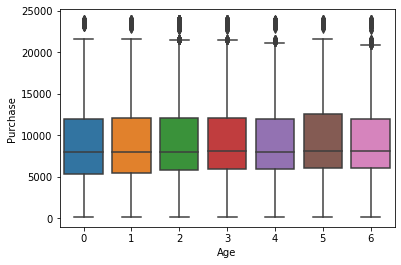

In [159]:
sns.boxplot('Age', 'Purchase', data=dataset)
plt.show()

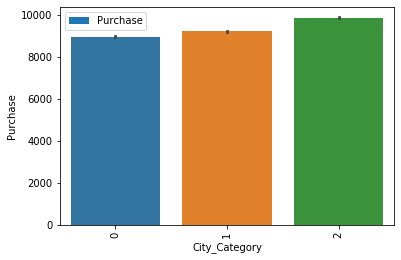

In [161]:
#city category affects the purchase. People belonging to category 2 tend to spend a little more. 
#These might be the more developed cities.

dataset[['City_Category', 'Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data=dataset)
plt.show()

### Heatmap to clearly see the correlations 
It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

- Product_Category_1 has a negative correlation with Purchase.
- Maritial_Status and Age are strongly correlated. As Expected.
- Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

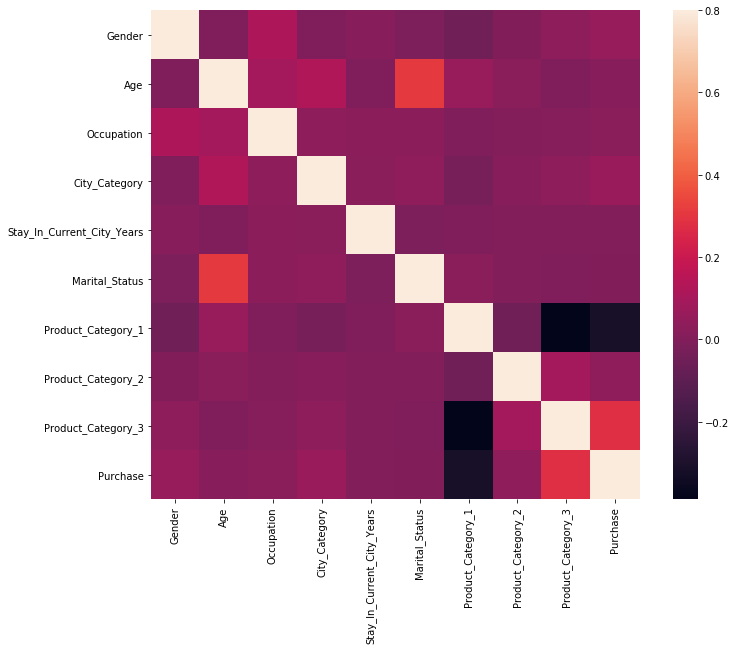

In [162]:
corrmat = dataset.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [164]:
mean_cat_1 = dataset['Product_Category_1'].mean()
mean_cat_2 = dataset['Product_Category_2'].mean()
mean_cat_3 = dataset['Product_Category_3'].mean()
print(f'PC1: {mean_cat_1} \nPC2: {mean_cat_2} \nPC3: {mean_cat_3}')

PC1: 5.295546498455105 
PC2: 6.784907092379324 
PC3: 3.871772787898292


### Conclusion
It can be seen that product category 3 is much lesser in price than 1 or 2. Hence, is the strong correlation from the heatmap

### Reference
https://www.kaggle.com/tanmaylata/black-friday-dataset-analysis-and-predictions/comments